**1. Data Loading and Preliminary Analysis**

* Load the "penguins.csv" dataset into a DataFrame.

* Display the first few rows of the dataset and summarize its structure, including the number of rows/columns and data types.





In [24]:
import pandas as pd

data_frame = pd.read_csv('penguins.csv')

print(data_frame.head(5))

print("\nSummary of the structure of the dataset is:")
print(data_frame.info())

   rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  

Summary of the structure of the dataset is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-nu

* Plot two Attributes(bill_length_mm, bill_depth_mm)

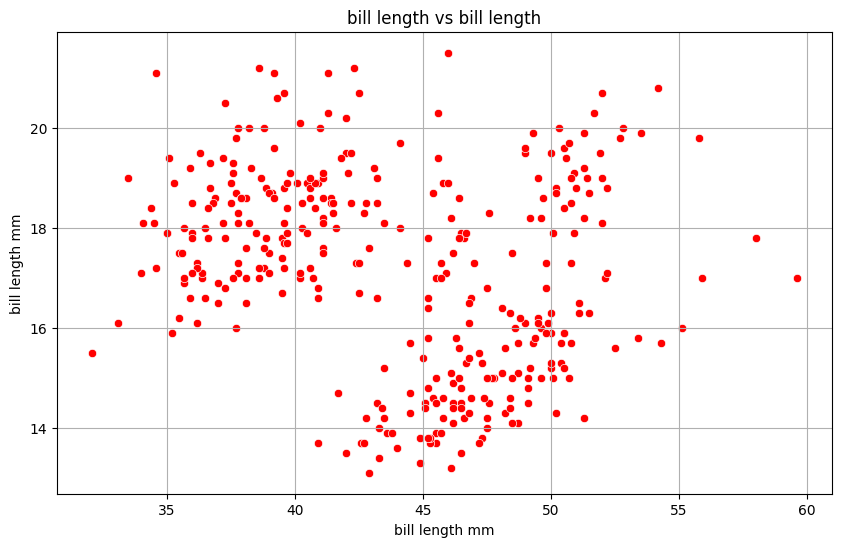

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_frame, x='bill_length_mm', y='bill_depth_mm' ,color='red')
plt.title('bill length vs bill length')
plt.xlabel('bill length mm')
plt.ylabel('bill length mm')
plt.grid(True)
plt.show()

* Project the data points of Two Attributes(bill_length_mm, bill_depth_mm) into line [1.74,-2.15], and plot the original points and projected points.

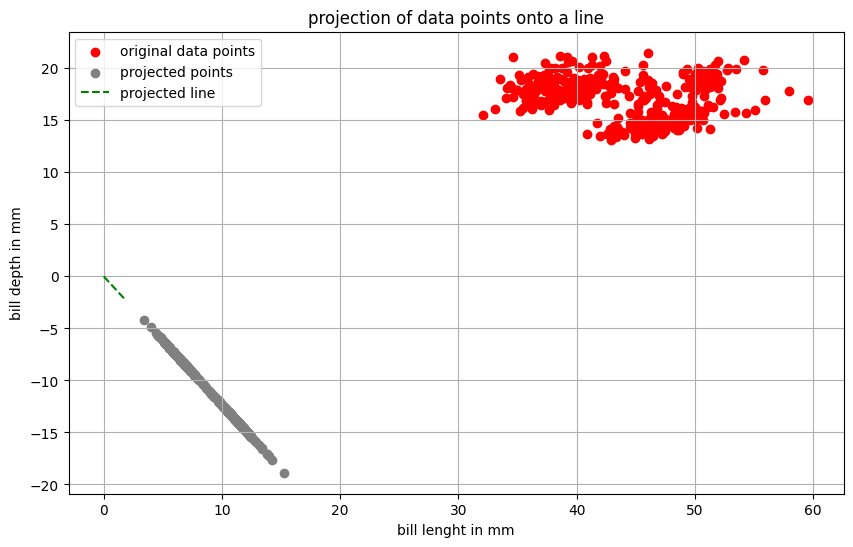

In [26]:
import numpy as np

bill_length = data_frame['bill_length_mm'].values
bill_depth = data_frame['bill_depth_mm'].values

proj_vector = np.array([1.74, -2.15])

dot_product = np.dot(np.column_stack((bill_length, bill_depth)), proj_vector)

proj_length = np.linalg.norm(proj_vector)
proj_magnitude = dot_product / proj_length**2
proj_points = np.outer(proj_magnitude, proj_vector)

plt.figure(figsize=(10, 6))
plt.scatter(bill_length, bill_depth, label='original data points', color='red')
plt.scatter(proj_points[:,0], proj_points[:,1], label='projected points', color='gray')
plt.plot([0, proj_vector[0]], [0, proj_vector[1]], linestyle='--', color='green', label='projected line')
plt.title('projection of data points onto a line')
plt.xlabel('bill lenght in mm')
plt.ylabel('bill depth in mm')
plt.legend()
plt.grid(True)
plt.show()


**2. Advanced Statistical Analysis**

* Compute the Multivariate Mean Vector:

Calculate the mean for each attribute in the dataset.


In [27]:

data_frame = pd.read_csv("penguins.csv")

num_attributes = data_frame.select_dtypes(include=[np.number])

mv = num_attributes.mean()

print("multivariate mean vector of the data:")
print(mv)
print()

data_centered = num_attributes - mv

scv = data_centered.T @ data_centered / (len(data_centered) - 1)

print("sample covariance matrix (inner Product):")
print(scv)


multivariate mean vector of the data:
rowid                 172.500000
bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
dtype: float64

sample covariance matrix (inner Product):
                         rowid  bill_length_mm  bill_depth_mm  \
rowid              9890.000000             NaN            NaN   
bill_length_mm             NaN             NaN            NaN   
bill_depth_mm              NaN             NaN            NaN   
flipper_length_mm          NaN             NaN            NaN   
body_mass_g                NaN             NaN            NaN   
year                 27.597668             NaN            NaN   

                   flipper_length_mm  body_mass_g       year  
rowid                            NaN          NaN  27.597668  
bill_length_mm                   NaN          NaN        NaN  
bill_depth_mm                    NaN          NaN        NaN 

* Compute the Sample Covariance Matrix (Outer Product): Use the outer product between the centered data points (Numerical Attributes only).

In [28]:
cm = (data_centered.T @ data_centered) / (data_centered.shape[0] - 1)

print("sample covariance Matrix:")
print(cm)

sample covariance Matrix:
                         rowid  bill_length_mm  bill_depth_mm  \
rowid              9890.000000             NaN            NaN   
bill_length_mm             NaN             NaN            NaN   
bill_depth_mm              NaN             NaN            NaN   
flipper_length_mm          NaN             NaN            NaN   
body_mass_g                NaN             NaN            NaN   
year                 27.597668             NaN            NaN   

                   flipper_length_mm  body_mass_g       year  
rowid                            NaN          NaN  27.597668  
bill_length_mm                   NaN          NaN        NaN  
bill_depth_mm                    NaN          NaN        NaN  
flipper_length_mm                NaN          NaN        NaN  
body_mass_g                      NaN          NaN        NaN  
year                             NaN          NaN   0.669706  


* Compute the Correlation Between Two Attributes(bill_length_mm, bill_depth_mm)

In [29]:
a1 = 'bill_length_mm'
a2 = 'bill_depth_mm'

correlation_between_attributes = data_frame[a1].corr(data_frame[a2])

print(f"correlation between 2 attributes: {correlation_between_attributes}")

correlation between 2 attributes: -0.23505287035553257


* Compute the correlation between the two attributes(bill_length_mm, bill_depth_mm) by calculating the cosine of the angle between the centered attribute vectors. Include a scatter plot of these two attributes.

correlation between attributes: nan


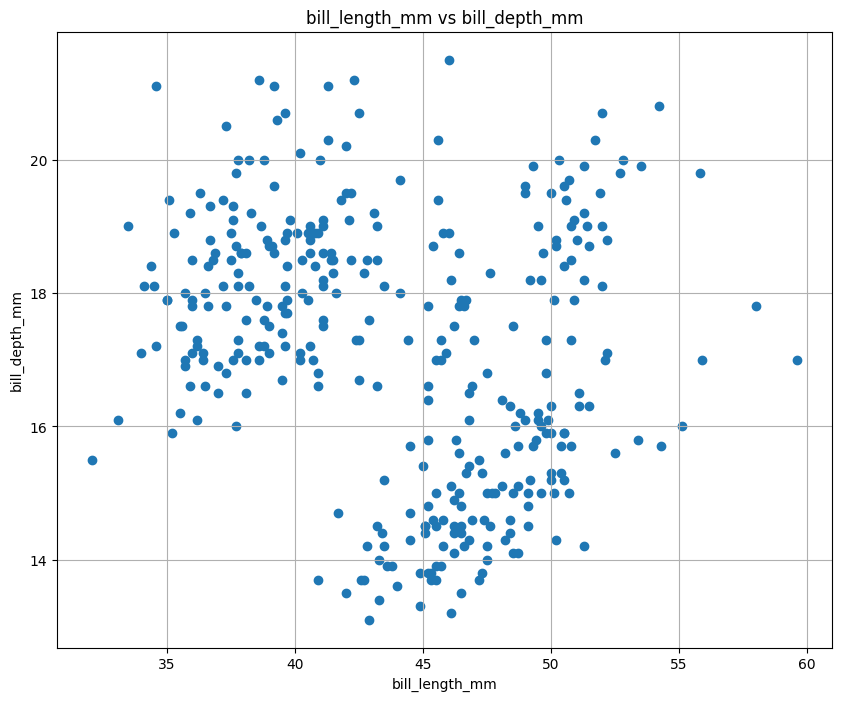

In [30]:
mean_a1 = data_frame[a1].mean()
mean_a2 = data_frame[a2].mean()
centered_a1 = data_frame[a1] - mean_a1
centered_a2 = data_frame[a2] - mean_a2

angle = np.dot(centered_a1, centered_a2) / (np.linalg.norm(centered_a1) * np.linalg.norm(centered_a2))
correlation = angle

print(f"correlation between attributes: {correlation}")

plt.figure(figsize=(10, 8))
plt.scatter(data_frame[a1], data_frame[a2])
plt.title(f"{a1} vs {a2}")
plt.xlabel(a1)
plt.ylabel(a2)
plt.grid(True)
plt.show()


* Compute the Covariance matrix of the three categorical attributes (species, island, and sex).

In [31]:
cat_att = ['species', 'island', 'sex']

one_hot = pd.get_dummies(data_frame[cat_att])

cov_mat = one_hot.cov()

print("covariance matrix of the three categorical attributes:")
print(cov_mat)


covariance matrix of the three categorical attributes:
                   species_Adelie  species_Chinstrap  species_Gentoo  \
species_Adelie           0.247339          -0.087599       -0.159740   
species_Chinstrap       -0.087599           0.159062       -0.071462   
species_Gentoo          -0.159740          -0.071462        0.231202   
island_Biscoe           -0.088142          -0.096820        0.184962   
island_Dream             0.003526           0.126788       -0.130314   
island_Torgersen         0.084616          -0.029968       -0.054648   
sex_female               0.000271           0.004034       -0.004305   
sex_male                -0.003593           0.002305        0.001288   

                   island_Biscoe  island_Dream  island_Torgersen  sex_female  \
species_Adelie         -0.088142      0.003526          0.084616    0.000271   
species_Chinstrap      -0.096820      0.126788         -0.029968    0.004034   
species_Gentoo          0.184962     -0.130314         -

* Probability Density Function: Assuming the first numerical attribute is normally distributed, plot its probability density function.

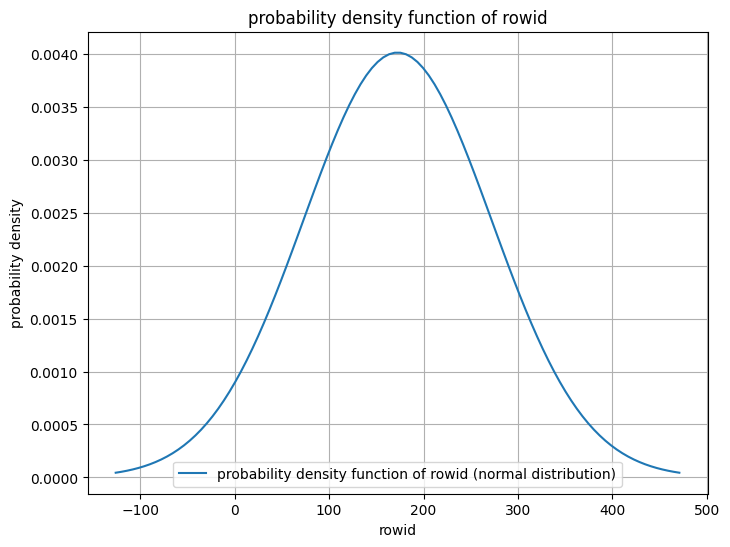

In [32]:
from scipy.stats import norm 

a = data_frame.select_dtypes(include='number').columns[0]

mean_of_data = data_frame[a].mean()
standard_deviation = data_frame[a].std()

x = np.linspace(mean_of_data - 3 * standard_deviation, mean_of_data + 3 * standard_deviation, 100)
prob_den_func = norm.pdf(x, mean_of_data, standard_deviation)

plt.figure(figsize=(8, 6))
plt.plot(x, prob_den_func, label=f'probability density function of {a} (normal distribution)')
plt.title(f'probability density function of {a}')
plt.xlabel(a)
plt.ylabel('probability density')
plt.legend()
plt.grid(True)
plt.show()


* Covariance Analysis: Determine which pair of attributes has the largest and smallest covariance. Print these values.

In [33]:
num_att = data_frame.select_dtypes(include='number').columns

cov_matrix = data_frame[num_att].cov()

largest_cp = cov_matrix.unstack().idxmax()
smallest_cp = cov_matrix.unstack().idxmin()

largest_cov = cov_matrix.unstack().max()
smallest_cov = cov_matrix.unstack().min()

print("attributes with the largest covariance:", largest_cp, "with value", largest_cov)
print("attributes with the smallest covariance:", smallest_cp, "with value", smallest_cov)


attributes with the largest covariance: ('body_mass_g', 'body_mass_g') with value 643131.0773267482
attributes with the smallest covariance: ('bill_depth_mm', 'body_mass_g') with value -747.3700931213696


**3.Write two paragraphs describing all the points mentioned above.**

           The "penguins.csv" dataset is loaded into a DataFrame, and its structure is summarized, to start the study. The dataset consists of five rows with seven columns: sex, body_mass_g, bill_length_mm, bill_depth_mm, flipper_length_mm, and species. First, a scatter plot is used to illustrate the association between bill_length_mm and bill_depth_mm, emphasizing the data points belonging to distinct species and sexes. In order to visualize both the original and projected points and comprehend how the data aligns with this direction, the data points for these qualities are additionally projected onto a designated vector.Additionally, the data points are projected onto a vector [1.74, -2.15], enabling a comparison of original and projected data to assess alignment with the specified direction.

           The sample covariance matrix is produced using both inner and outer product methods to evaluate variability and relationships among attributes. This is done after computing the multivariate mean vector, which provides average values for numerical attributes. A scatter plot is used to show the relationship between bill_length_mm and bill_depth_mm after correlation analysis. Additionally, the covariance matrix for the categorical attributes (sex, island, and species) is found. Assuming a normal distribution, a probability density function graphic is produced for the first numerical attribute, bill_length_mm. The analysis concludes by highlighting the strongest and weakest linear correlations in the dataset by identifying attribute pairings with the biggest and smallest covariance. This all-encompassing method guarantees a deep comprehension of the structure of the penguin dataset and the relationships between its various features.